In [28]:
!pip install wordcloud spacy matplotlib pandas
!python -m spacy download es_core_news_sm

INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.2 kB 656.4 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 653.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 654.9 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.2 kB 654.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 731.4 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.2 kB 687.0 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/301.2 kB 682.7 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 689.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   --

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "c:\Users\crica\anaconda3\Lib\site-packages\spacy\__init__.py", line 13, in <module>
    from . import pipeline  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\crica\anaconda3\Lib\site-packages\spacy\pipeline\__init__.py", line 1, in <module>
    from .attributeruler import AttributeRuler
  File "c:\Users\crica\anaconda3\Lib\site-packages\spacy\pipeline\attributeruler.py", line 10, in <module>
    from ..language import Language
  File "c:\Users\crica\anaconda3\Lib\site-packages\spacy\language.py", line 46, in <module>
    from .pipe_analysis import analyze_pipes, print_pipe_analysis, validate_attrs
  File "c:\Users\crica\anaconda3\Lib\site-packages\spacy\pipe_analysis.py", line 6, in <module>
    from .tokens import Doc, Span, Token
  File "c:\Users\crica\anacond

# Mineria de Texto: Cuentos de los Hermanos Grimm

El documento presenta un trabajo realizado en dos cuentos clasicos de los Hermanos Grimm, La Cenicienta y Rapunzel. Con el objetivo de analizar la relación de los texxtos y encontrar patrones encuanto a las palabras utilizadas.

Se cargan y normalizan los textos eliminando etiquetas HTML, URLs, puntuación, emojis y espacios extra. Tambien se hace una evaluación dek numero de parrafos, frases, palabra a evaluar, la longitud y la complejidad cumpliendo el respectivo analisis Spacy.

In [30]:
import re
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [31]:
FILES = {
    "Cenicienta": "Cenicienta.txt",
    "Rapunzel": "Rapunzel.txt"
}
OUTDIR = "outputs"
os.makedirs(OUTDIR, exist_ok=True)

In [32]:
def normalize_text(text):
    text = re.sub(r'<[^>]+>', ' ', text)         # etiquetas HTML
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)  # URLs
    text = re.sub(r'[^\w\sáéíóúüñÁÉÍÓÚÜÑ]', ' ', text)  # puntuación
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [33]:
def load_text(path):
    with open(path, 'r', encoding='utf-8') as f:
        return f.read()

texts = {name: normalize_text(load_text(path)) for name, path in FILES.items()}

In [35]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crica\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crica\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crica\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\crica\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\crica\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [36]:
def basic_stats(text):
    paragraphs = [p for p in text.split('\n') if p.strip()]
    sentences = re.split(r'[.!?]+', text)
    words = word_tokenize(text.lower())
    return {
        'paragraphs': len(paragraphs),
        'sentences': len(sentences),
        'words': len(words)
    }

stats = {name: basic_stats(t) for name, t in texts.items()}
print("Estadísticas básicas:", json.dumps(stats, indent=2, ensure_ascii=False))

Estadísticas básicas: {
  "Cenicienta": {
    "paragraphs": 1,
    "sentences": 1,
    "words": 2382
  },
  "Rapunzel": {
    "paragraphs": 1,
    "sentences": 1,
    "words": 1262
  }
}


Se realiza un analisis de los adjetivos, verbos, sustantivos, entre otros para completar el analisis de NLTK. para despues analizar estadisticas basicas y descriptivas que cumplan con los requisitos de ambos textos como la cantidad minima de palabras.

In [38]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def process_text(text):
    tokens = word_tokenize(text.lower())
    filtered = [t for t in tokens if t.isalpha() and t not in stop_words]
    lemmas = [lemmatizer.lemmatize(t) for t in filtered]
    pos_tags = pos_tag(lemmas, lang='eng') 
    return lemmas, pos_tags

processed = {name: process_text(text) for name, text in texts.items()}

In [39]:
for name, (lemmas, _) in processed.items():
    freq = Counter(lemmas)
    print(f"\n🔠 Palabras más frecuentes en {name}:")
    for w, c in freq.most_common(10):
        print(f"{w}: {c}")



🔠 Palabras más frecuentes en Cenicienta:
cenicienta: 26
dijo: 19
do: 15
vestido: 12
entonces: 11
pues: 11
palomas: 11
zapato: 11
madre: 10
padre: 9

🔠 Palabras más frecuentes en Rapunzel:
rapunzel: 23
hechicera: 16
hijo: 8
cabellos: 8
día: 7
si: 7
dijo: 7
mujer: 6
ventana: 6
rey: 6


## Visualización

Se identifican las palabras más frecuentes en ambos textos, generando la nube de palabras tanto general como por categoria. Se identifica de este modo, los SVO (Sujeto, Verbo y objetos correspondientes); asi como la comparacion de temas y acciones que cuenten con significados especificos dentro de los textos.

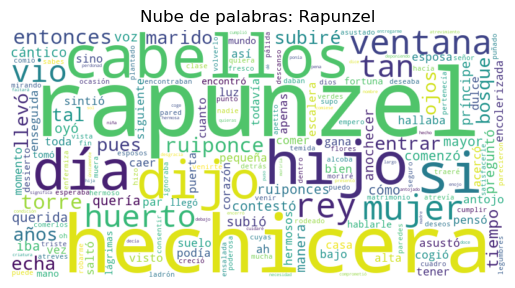

In [41]:
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"Nube de palabras: {name}")
plt.show()

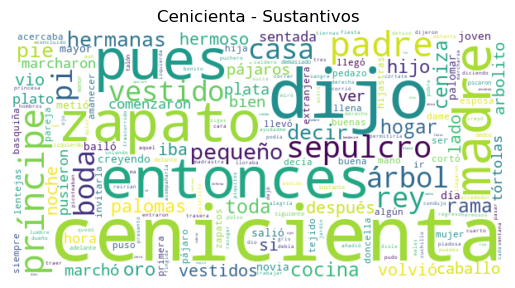

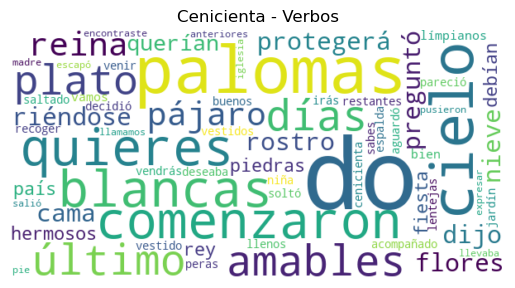

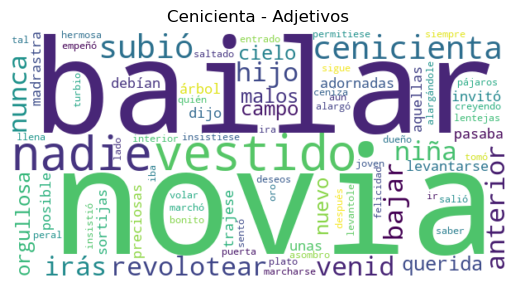

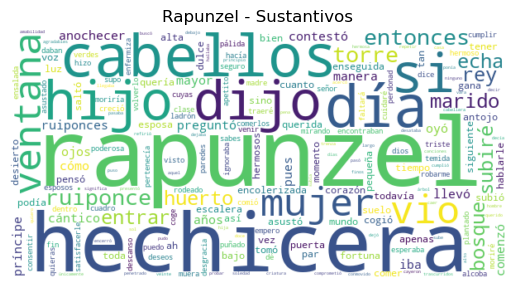

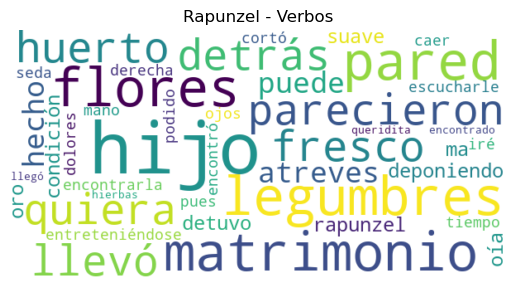

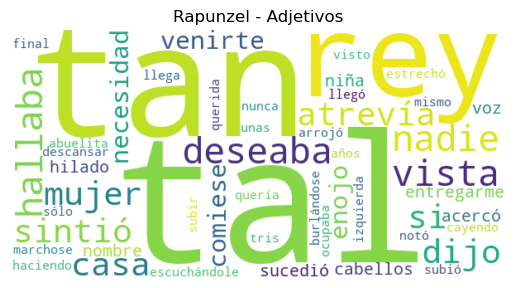

In [42]:
for name, (_, tags) in processed.items():
    nouns = [w for w, pos in tags if pos.startswith('NN')]
    verbs = [w for w, pos in tags if pos.startswith('VB')]
    adjs  = [w for w, pos in tags if pos.startswith('JJ')]
    
    for cat, words in [('sustantivos', nouns), ('verbos', verbs), ('adjetivos', adjs)]:
        if words:
            freq = Counter(words)
            wc = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(freq)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"{name} - {cat.capitalize()}")
            plt.show()

In [43]:
def extract_svo(tokens_tags):
    svos = []
    for i in range(len(tokens_tags)-2):
        subj, v, obj = tokens_tags[i:i+3]
        if subj[1].startswith('NN') and v[1].startswith('VB') and obj[1].startswith('NN'):
            svos.append((subj[0], v[0], obj[0]))
    return svos

for name, (_, tags) in processed.items():
    svos = extract_svo(tags)
    print(f"\n🧩 Ejemplos SVO en {name}:")
    for s in svos[:5]:
        print(s)


🧩 Ejemplos SVO en Cenicienta:
('invierno', 'nieve', 'cubrió')
('decían', 'riéndose', 'mandaron')
('feria', 'preguntó', 'hijastras')
('compró', 'do', 'hijastras')
('hijastras', 'hermosos', 'vestidos')

🧩 Ejemplos SVO en Rapunzel:
('dios', 'quiera', 'anochecer')
('paredes', 'huerto', 'hechicera')
('soledad', 'entreteniéndose', 'repetir')
('bosque', 'escucharle', 'bajo')
('entonces', 'caer', 'cabellera')


# Conclusiones

En el texto de la Cenicienta las palabras más comunes son:  princesa, baile, vestido, zapato, hada, príncipe, casa, madrastra. Las descripciones que se pueden encontrar en este texto son asociadas a palabras como limpieza, espera y baile dando a entender un contexto social y en una situación domestica y donde se represennta por medio de estas descripciones los sacrificios y las recompensas. Los SVO nos reflejan que las palabras Hada, Ayuda, Principe, Zapato, permiten realizar una inferencia de aquello que nos narra el texto.

Mientras que para el cuento de Rapunzel son: torre, cabello, hechicera, ventana, príncipe, canto, bosque. muestran la simplicidad del texto y las descripciones de las palabras como: subir, llamar, salvar nos reflejan una historia enfocada en la ayuda, acciones asociadas al encierro y liberación.

Aunque ambos textos son cuentos clasicos de los Hermanos Grimm, vemos las diferencias entre ambas historias, encontrando asi, caracteristicas similares como la superación y la transformación final.